# What factor most affects the violent crime rate of a city?


In [1]:
# Import dep
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from scipy.stats import linregress
import csv
!pip install Census
from census import Census
from scipy import stats
!pip install plotly==4.14.3
import plotly.express as px
import plotly.graph_objects as go

     |████████████████████████████████| 13.2MB 324kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
# import  data


Mounted at /content/gdrive


In [3]:
#Import city population data
path= "/content/gdrive/MyDrive/project_team_2/city_pop_data.csv"
city_df = pd.read_csv(path)


In [4]:
city_df

,City,State,Population
0,Irving,Texas,239798
1,El Paso,Texas,681728
2,Henderson,Nevada,320189
3,Boise,Idaho,228959
4,Virginia Beach,Virginia,449974
5,Detroit,Michigan,670031
6,St Louis,Missouri,300576
7,Memphis,Tennessee,651073
8,Baltimore,Mayland,593490
9,Cleveland,Ohio,381009


In [5]:
#DataFrame of city police agency codes (FBI ORI) for selected cities
agency_code = ['TX0571500','TX0710200','NV0020300','ID0010100','VA1280000','MI8234900',
               'MOSPD0000','TNMPD0000','MDBPD0000','OHCLP0000','TX0430600',
               'AZ0072500','NB0550100','TX2400100','CA0302600','MOKPD0000',
               'WIMPD0000','CA0390500','CA0010900','ILCPD0000']
cities = ['Irving','El Paso','Henderson','Boise','Virginia Beach','Detroit','St Louis','Memphis',
          'Baltimore','Cleveland','Plano','Scottsdale','Lincoln','Laredo','Irvine',
          'Kansas City','Milwaukee','Stockton','Oakland','Chicago']
city_police_df = pd.DataFrame({
    'City':cities,
    'Agency Code':agency_code
})

In [6]:
#Violent crime data from FBI API
url1 = "https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/"
url2 = "/violent-crime/2019/2019?API_KEY="
fbi_api_key = "iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"
violent_crimes = []
for code in agency_code:
  agencies_data = requests.get(url1 + code + url2 + fbi_api_key).json()
  violent_crimes.append(agencies_data)

vc_actual = [violent_crimes[x]['results'][0]['actual'] for x in range(len(violent_crimes))]
print("Violent crime city rates (actual): ")
print(vc_actual) #Checking for returned values
city_police_df['Crimes (Actual)'] = vc_actual

Violent crime city rates (actual): 
[617, 2509, 543, 756, 636, 13622, 5792, 12723, 11101, 6203, 484, 415, 1115, 936, 188, 7308, 8152, 4380, 5520, 25532]


In [7]:
#City crime rates sorted lowest to highest
crime_pop_df = city_police_df.merge(city_df,on="City",how="left")
crime_pop_df['Crime Rate (per 1000)'] = crime_pop_df['Crimes (Actual)'].astype(float) / (crime_pop_df['Population'].astype(float)/1000)
crime_pop_df = crime_pop_df.sort_values('Crime Rate (per 1000)')
crime_pop_df.head()

,City,Agency Code,Crimes (Actual),State,Population,Crime Rate (per 1000)
14,Irvine,CA0302600,188,California,287401,0.654138
4,Virginia Beach,VA1280000,636,Virginia,449974,1.413415
11,Scottsdale,AZ0072500,415,Arizona,258069,1.608097
10,Plano,TX0430600,484,Texas,287677,1.682442
2,Henderson,NV0020300,543,Nevada,320189,1.695873


In [8]:
#Import Poverty data
path= "/content/gdrive/MyDrive/project_team_2/poverty_data1.csv"
poverty_df = pd.read_csv(path)
poverty_df.head(10)

,City,State,Poverty Rate
0,Irving,Texas,13.5
1,El Paso,Texas,20.0
2,Henderson,Nevada,8.5
3,Boise,Idaho,13.5
4,Virginia Beach,Virginia,7.6
5,Detroit,Michigan,36.4
6,St Louis,Missouri,24.2
7,Memphis,Tennessee,26.8
8,Baltimore,Mayland,21.8
9,Cleveland,Ohio,34.6


In [9]:
#read csv file on police density in each city
#Henderson, NV currently missing, working on finding that data -Alyssa
file = "/content/gdrive/MyDrive/project_team_2/police_density_data.csv"
police_df = pd.read_csv(file)

In [10]:
police_df.head()

,City,Population,Total_Law,Total_Officers,Total_Civilians
0,Irving,245423,525,364,161
1,El Paso,686793,1412,1171,241
2,Henderson,320189,391,391,0
3,Boise,231214,385,298,87
4,Virginia Beach,449038,938,760,178


In [11]:
#Import educational attainment data and format columns
path = '/content/gdrive/MyDrive/project_team_2/education_data.csv'
education_df = pd.read_csv(path)

education_df = education_df.drop('geoid', axis=1)
education_df = education_df.drop(columns=[
    'B15003001, Error','B15003002, Error','B15003003, Error','B15003004, Error',
    'B15003005, Error','B15003006, Error','B15003007, Error','B15003008, Error',
    'B15003009, Error','B15003010, Error','B15003011, Error','B15003012, Error',
    'B15003013, Error','B15003014, Error','B15003015, Error','B15003016, Error',
    'B15003017, Error','B15003018, Error','B15003019, Error','B15003020, Error',
    'B15003021, Error','B15003022, Error','B15003023, Error','B15003024, Error',
    'B15003025, Error','B15003003','B15003004','B15003005','B15003006','B15003007',
    'B15003008','B15003009','B15003010','B15003011','B15003012','B15003013',
    'B15003014','B15003015','B15003016'])

education_df = education_df.rename(columns={
    'B15003001':'Pop 25 and Over','B15003002':'No school','B15003017':'High school diploma',
    'B15003018':'GED or equivalent','B15003019':'Less than 1 year college',
    'B15003020':'1 or more years college, no degree','B15003021':'Associates Degree',
    'B15003022':'Bachelors Degree','B15003023':'Masters Degree',
    'B15003024':'Professional School Degree','B15003025':'Doctorate Degree'
})

In [12]:
#Combine education data and create dataframe for relevant statistics
hs_ged = (education_df['High school diploma'] + education_df['GED or equivalent'] +
          education_df['Less than 1 year college'] + education_df['1 or more years college, no degree'])
college_degree = (education_df['Associates Degree'] + education_df['Bachelors Degree'] +
                  education_df['Masters Degree'] + education_df['Professional School Degree'] +
                  education_df['Doctorate Degree'])
hs_or_higher = (education_df['High school diploma'] + education_df['GED or equivalent'] +
          education_df['Less than 1 year college'] + education_df['1 or more years college, no degree'] +
          education_df['Associates Degree'] + education_df['Bachelors Degree'] +
          education_df['Masters Degree'] + education_df['Professional School Degree'] +
          education_df['Doctorate Degree'])
hs_ged_pct = round((hs_ged / education_df['Pop 25 and Over'])*100,2)
hs_higher_pct = round((hs_or_higher / education_df['Pop 25 and Over'])*100,2)
college_deg_pct = round((college_degree / education_df['Pop 25 and Over'])*100,2) 
edu_overview_df = pd.DataFrame({
    'City':education_df['name'],
    'Pop 25 and Over':education_df['Pop 25 and Over'],
    'High School or GED':hs_ged,
    'Percent with HS or GED':hs_ged_pct,
    'High School or higher':hs_or_higher,
    'Percent with HS or higher':hs_higher_pct,
    'College Degree':college_degree,
    'Percent with College Degree':college_deg_pct
})

edu_overview_df.head()

,City,Pop 25 and Over,High School or GED,Percent with HS or GED,High School or higher,Percent with HS or higher,College Degree,Percent with College Degree
0,Scottsdale,204968,59347,28.95,198912,97.05,139565,68.09
1,Irvine,186687,37006,19.82,181118,97.02,144112,77.19
2,Oakland,315220,99514,31.57,270851,85.92,171337,54.35
3,Stockton,196661,96492,49.07,150288,76.42,53796,27.35
4,Boise City,158492,68256,43.07,149325,94.22,81069,51.15


In [13]:
#DataFrame combining all relevant statistics
cities = city_df["City"]
population = city_df["Population"]/1000
poverty_percentage = poverty_df["Poverty Rate"]
crime_rate=crime_pop_df['Crime Rate (per 1000)']
police = police_df['Total_Officers']
college = edu_overview_df['Percent with College Degree']
hs = edu_overview_df['Percent with HS or higher']
final_data_df=pd.DataFrame({
    "City":cities,
    "Population":population,
    "Poverty Rate":poverty_percentage,
    "Crime Rate":crime_rate,
    "Number of Police":police,
    "Percent with HS or higher":hs,
    "Percent with College Degree":college
    })

final_data_df.head(20)

,City,Population,Poverty Rate,Crime Rate,Number of Police,Percent with HS or higher,Percent with College Degree
0,Irving,239.798,13.5,2.572999,364,97.05,68.09
1,El Paso,681.728,20.0,3.680353,1171,97.02,77.19
2,Henderson,320.189,8.5,1.695873,391,85.92,54.35
3,Boise,228.959,13.5,3.301901,298,76.42,27.35
4,Virginia Beach,449.974,7.6,1.413415,760,94.22,51.15
5,Detroit,670.031,36.4,20.330403,2517,85.74,47.24
6,St Louis,300.576,24.2,19.269669,1201,85.74,38.14
7,Memphis,651.073,26.8,19.541588,2058,83.64,23.65
8,Baltimore,593.490,21.8,18.704612,2465,91.25,43.54
9,Cleveland,381.009,34.6,16.280455,1560,89.52,44.08


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quantile = poverty_percentage.quantile([0.25,0.5,0.75])
lower_quartile = quantile[.25]
upper_quartile = quantile[.75]
 
IQR = upper_quartile - lower_quartile
    
# Determine outliers using upper and lower bounds
upper_bound = upper_quartile + 1.5*(IQR)
lower_bound = lower_quartile - 1.5*(IQR)
 
outliers = poverty_percentage.loc[(poverty_percentage > upper_bound) | (poverty_percentage < lower_bound)]
    
print(f"The Outliers for crime rate vs poverty rate are {outliers}")

The Outliers for crime rate vs poverty rate are Series([], Name: Poverty Rate, dtype: float64)


In [15]:
#Poverty Rate bar graph
poverty_bar = px.bar(final_data_df ,x='City', y='Poverty Rate', labels={'Poverty Rate':'Poverty Rate (%)'}, title='Poverty Rate by City')
poverty_bar.show()

In [16]:
#Education data bar graph
labels = edu_overview_df['City']
high_ged = edu_overview_df['Percent with HS or GED']
coll = edu_overview_df['Percent with College Degree']

edu_bar = go.Figure(data=[go.Bar(name="HS or GED Only", x=labels,y=high_ged), go.Bar(name='College Degree', x=labels, y=coll)])
edu_bar.update_layout(barmode='group',title='Educational Attainment by HS/GED and College Degree')
edu_bar.show()

In [17]:
#Police Density bar graph
police_bar = px.bar(final_data_df ,x='City', y='Number of Police', title='Police Density by City')
police_bar.show()

# Does population affect crime rate?

Summary: Below displays both a t-test and scatter plot of population vs. crime rate. The null hpythothesis was rejected, meaning there is a significant relationship between crime rate and pupulation. The scatter plot linear regession line also shows a positive correlation. Our findings indicate that the higher the population the higher the poverty rate. 

# Hypothesis Testing : 

 Uo (Null Hypothesis): There is no signifincance relationship between crime rate and population across cities

U1 (Hypothesis): There is signifincance relationship between crime rate and population across cities

In [18]:
pop= final_data_df['Population']
crime_rate = final_data_df['Crime Rate']

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(pop, crime_rate, equal_var=False)

Ttest_indResult(statistic=4.286182529333234, pvalue=0.0003984328583637716)

In [19]:
pop_fig = px.scatter(final_data_df ,x='Population', y='Crime Rate', trendline='ols', title='Population vs. Violent Crime Rate', hover_data=['City'])
pop_fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Does poverty rate affect crime rate? 

Summary: Below displays both a t-test and scatter plot of poverty rate vs. crime rate. The null hpythothesis was rejected, meaning there is a significant relationship between poverty rate and pupulation. The scatter plot linear regession line also shows a positive correlation. Our findings indicate that the higher the poverty rate the higher the crime rate. 

# Hypothersis Testing: 

Uo(Null Hypothesis): There is no signifigant relationship between crime rate and poverty rate across cities

U1 (Hypothesis): Ther is signifance relationship between crime rate and poverty rate across cities. 

In [20]:
pr= final_data_df['Poverty Rate']
crime_rate = final_data_df['Crime Rate']

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(pr, crime_rate, equal_var=False)

Ttest_indResult(statistic=3.8492950661957948, pvalue=0.0004528497743706038)

In [21]:
poverty_fig = px.scatter(final_data_df ,x='Crime Rate', y='Poverty Rate', trendline='ols', hover_data=['City'], title='Poverty Rate vs. Violent Crime Rate')
poverty_fig.show()

# Does law enforcement density affect crime rate? 

Summary: Below displays both a t-test and scatter plot of population vs. crime rate. The null hpythothesis was rejected, meaning there is a significant relationship between law enforcement density and pupulation. The scatter plot linear regession line also shows a positive correlation. Our findings indicate that higher the poverty rate the higher the crime rate. 

# Hypothesis Testing :

Uo (Null Hypothesis): There is no signifincance relationship between crime rate and police density across cities

U1 (Hypothesis): There is signifincance relationship between crime rate and police density across cities

In [22]:
p_density = police_df['Total_Officers']
crime_rate = final_data_df['Crime Rate']

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(p_density,crime_rate, equal_var=False)

Ttest_indResult(statistic=2.5356993168198483, pvalue=0.020160795892366263)

In [23]:
fig = px.scatter(final_data_df ,x='Number of Police', y='Crime Rate', trendline='ols', size='Number of Police', hover_data=['City'], title='Police Density vs. Violent Crime Rate')

fig.show()

# Does education affect crime rate? 

Summary: Below displays a t-test and scatter plot of high school or higher vs crime rate and college or higher vs. crimne rate. For percent completed high school or higher vs crime rate the null hpythothesis was rejected, meaning there is a significant relationship between crime rate and education. The scatter plot linear regession line also shows a negative correlation. Our findings indicate that the higher percentage of completed HS or higher the lower the crime rate. For percent completed college  or higher vs crime rate the null hpythothesis was rejected, meaning there is a significant relationship between crime rate and education. The scatter plot linear regession line also shows a negative correlation. Our findings indicate that the higher percentage of completed college or higher the lower the crime rate.

# Hypothesis Testing :

Uo (Null Hypothesis): There is no signifincance relationship between crime rate and high school completetion percentage cities

U1 (Hypothesis): There is signifincance relationship between crime rate and high school completetion percentage across cities

In [24]:
hs_ed = edu_overview_df['Percent with HS or higher']
crime_rate = final_data_df['Crime Rate']

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(hs_ed, p_density, equal_var=False)

Ttest_indResult(statistic=-2.4117888691830878, pvalue=0.02615511267846698)

In [25]:
hs_fig = px.scatter(final_data_df ,x='Percent with HS or higher', y='Crime Rate', trendline='ols', hover_data=['City'], title='Crime Rate vs. High School Education or GED')
hs_fig.show()

# Hypothesis Testing :

Uo (Null Hypothesis): There is no signifincance relationship between crime rate and college completetion percentage cities

U1 (Hypothesis): There is signifincance relationship between crime rate and college completetion percentage across cities

In [26]:
college_ed = edu_overview_df['Percent with College Degree']
crime_rate = final_data_df['Crime Rate']

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(college_ed, p_density, equal_var=False)

Ttest_indResult(statistic=-2.4798599277988407, pvalue=0.02268150892220965)

In [27]:
college_fig = px.scatter(final_data_df ,x='Percent with College Degree', y='Crime Rate', trendline='ols', hover_data=['City'], title='Crime Rate vs. College Education')
college_fig.show()

# FINAL CONCLUSION: 

The greatest coorelation was found between poverty rate and crime rate. The T-test resulted in the greatest rejection of the nul hypothesis and scatter plot has the greatest postive correlation. 

# Result:

# Poverty rate most affects the violent crime rate of a city. 

Text(0.5, 1.0, 'Crime Rate vs. Poverty Rate')

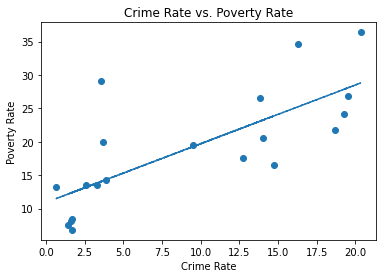

In [28]:
x = final_data_df["Crime Rate"]
y = final_data_df["Poverty Rate"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x , y)
regress_values = x * slope + intercept

colors = np.random

m_fit = slope * x + intercept
plt.scatter(x,y)
            

plt.plot(x,m_fit,"--")
plt.xlabel('Crime Rate')
plt.ylabel('Poverty Rate')
plt.title('Crime Rate vs. Poverty Rate')

Text(0.5, 1.0, 'Poverty Rate by City')

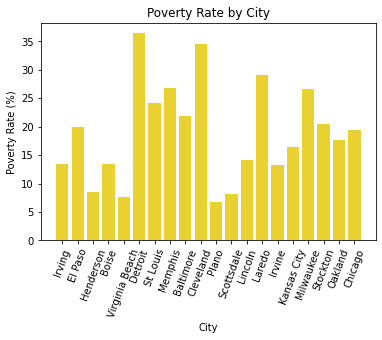

In [29]:
# Poverty Rate by City
plt.bar(cities,poverty_percentage,color=(0.9, 0.8, 0.1, 0.9))
    
degrees = 70
plt.xticks(rotation=degrees)

plt.xlabel('City')
plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rate by City')


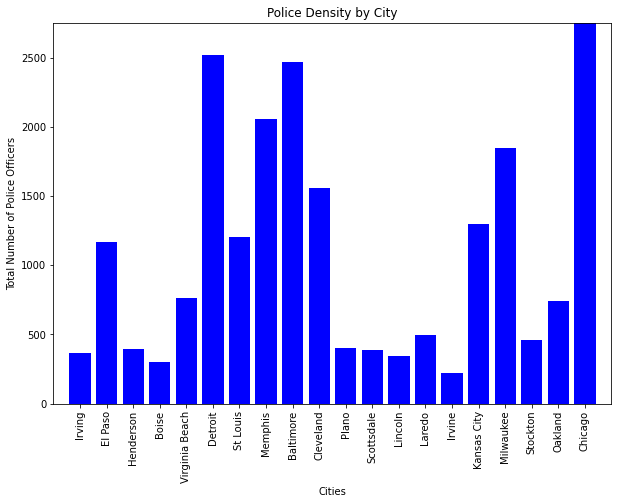

In [30]:
#visualization for police density by city
x_axis = np.arange(len(police_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,7))
plt.bar(x_axis, police_df['Total_Officers'], color='b', align='center')
plt.xticks(tick_locations, police_df['City'], rotation='vertical')

plt.xlim(-1,len(x_axis))
plt.ylim(0,2750)

plt.title('Police Density by City')
plt.xlabel('Cities')
plt.ylabel('Total Number of Police Officers')

plt.tight_layout
plt.show()

The r-value is: 0.08247604016701092


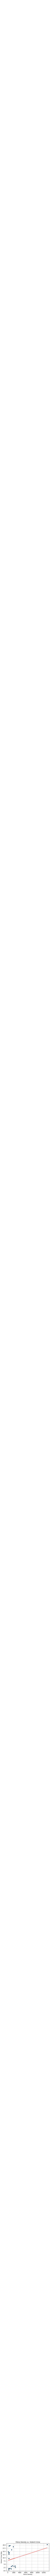

<Figure size 720x504 with 0 Axes>

In [31]:
#visualization police density vs violent crime
x_axis = police_df['Total_Officers']
y_axis = crime_pop_df['Crime Rate (per 1000)']

plt.scatter(x_axis, y_axis, marker='o', edgecolors='black')

plt.title('Police Density vs. Violent Crime')
plt.xlabel('Police Density')
plt.ylabel('Violent Crime Rate')
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(1500,2000),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

plt.figure(figsize=(10,7))
plt.show()